## 分级系统

In [1]:
import cv2
import numpy as np
import os
from glob import glob

def extract_color_histogram(image, bins=(8, 8, 8)):
    """
    Compute a 3D color histogram in the HSV color space,
    then normalize the histogram so that images
    with the same content, but either scaled larger or smaller
    will have (roughly) the same histogram.
    """
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Compute the color histogram
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def load_images_and_extract_features(image_folder):
    # Get a list of image file paths
    image_paths = glob(os.path.join(image_folder, '*.jpg'))
    features = []
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            continue
        # Extract color histogram feature
        hist = extract_color_histogram(image)
        # Append the features to the list
        features.append(hist)
    return features

# Example usage
image_folder = 'data'  # Replace with your folder containing the images
features = load_images_and_extract_features(image_folder)

# Output the features
for i, feature in enumerate(features):
    print(f"Image {i+1} feature vector: {feature[:5]}... (truncated)")  # Print first 5 elements of feature for brevity


Image 1 feature vector: [0.         0.00282526 0.07063141 0.0601376  0.01614432]... (truncated)
Image 2 feature vector: [0.         0.00312787 0.07663285 0.07428695 0.02658691]... (truncated)
Image 3 feature vector: [0.         0.01601033 0.02561653 0.00228719 0.00411694]... (truncated)
Image 4 feature vector: [0.         0.         0.01121351 0.0083197  0.00217036]... (truncated)
Image 5 feature vector: [0.00300565 0.05222309 0.06124002 0.01277399 0.0131497 ]... (truncated)
Image 6 feature vector: [0.00121577 0.02978646 0.04498363 0.01337351 0.00303943]... (truncated)
Image 7 feature vector: [0.00189304 0.02536669 0.04543287 0.03710351 0.01438708]... (truncated)
Image 8 feature vector: [0.00121651 0.0054743  0.01368576 0.00790733 0.01125274]... (truncated)
Image 9 feature vector: [0.01620307 0.02700512 0.01680319 0.00300057 0.00060011]... (truncated)
Image 10 feature vector: [0.         0.0574513  0.01068861 0.         0.        ]... (truncated)
Image 11 feature vector: [0.00305565 0.

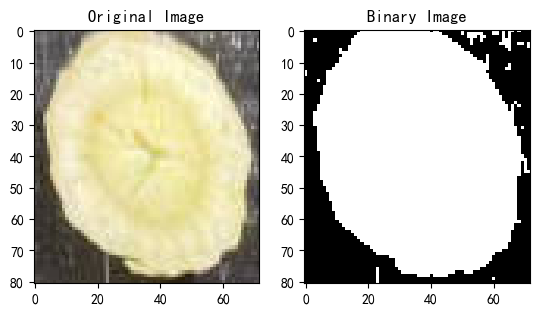

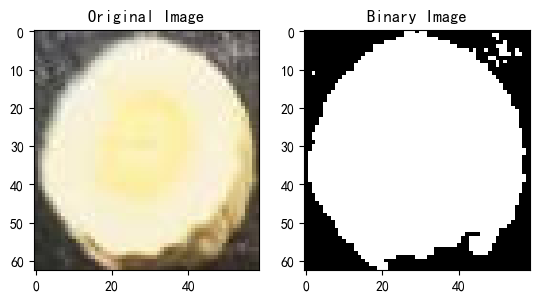

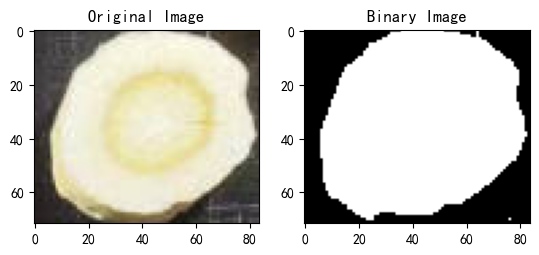

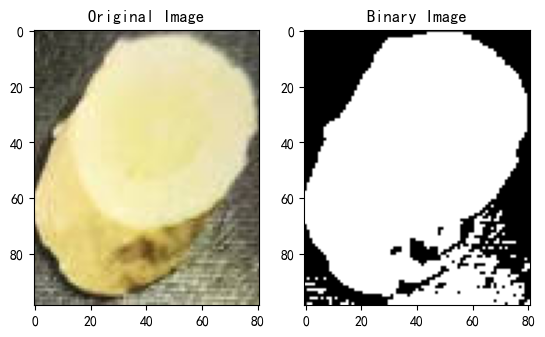

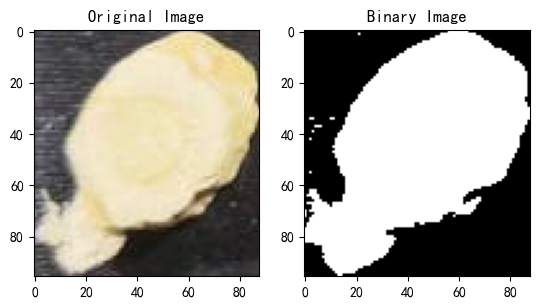

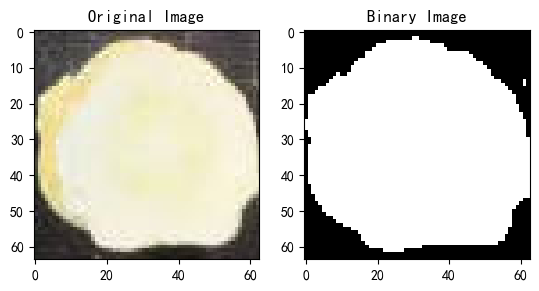

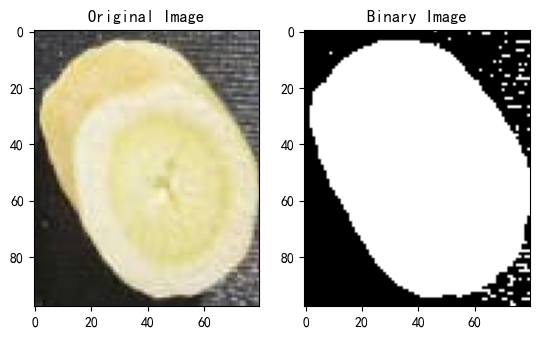

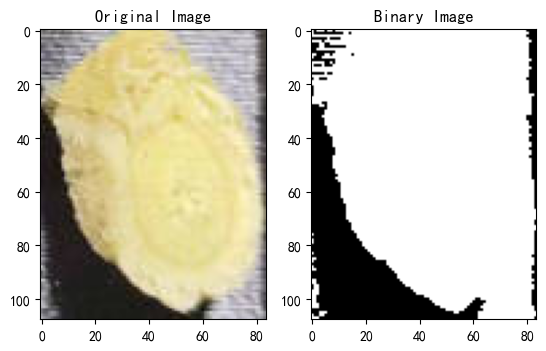

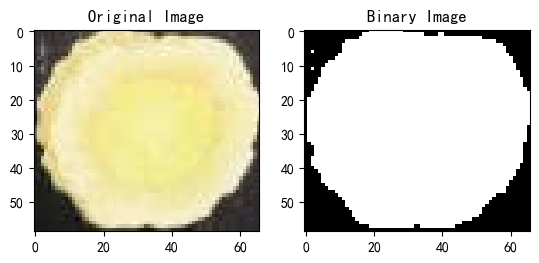

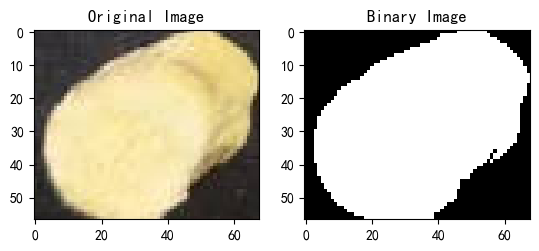

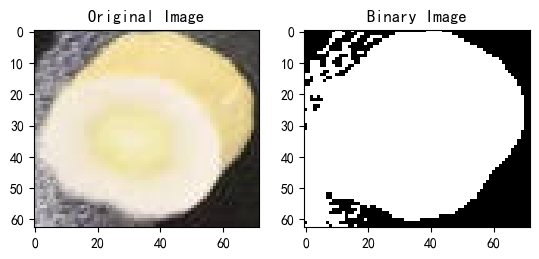

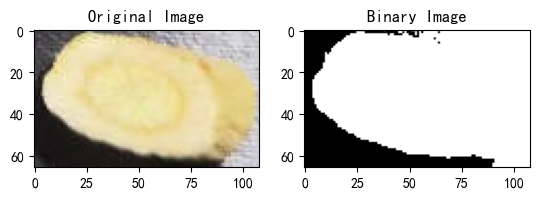

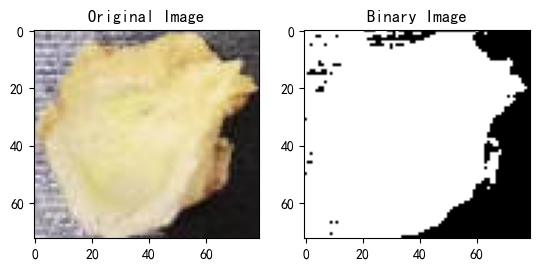

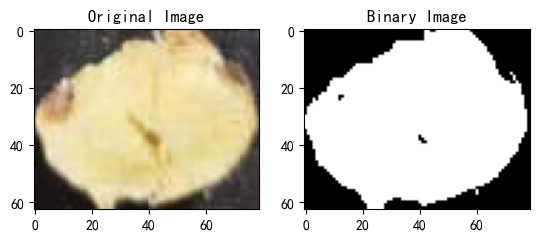

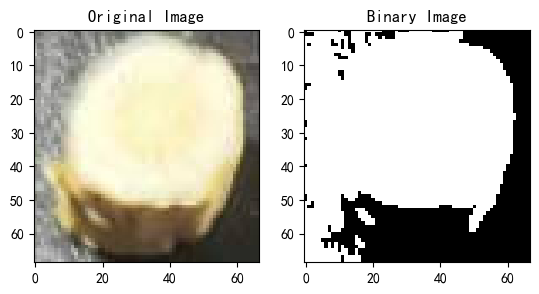

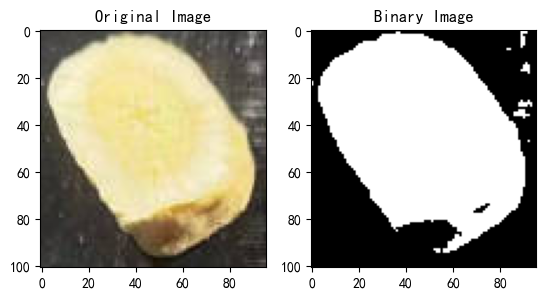

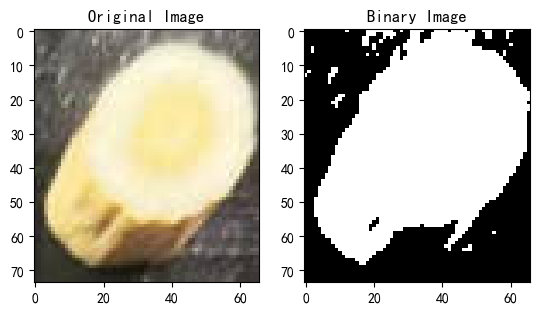

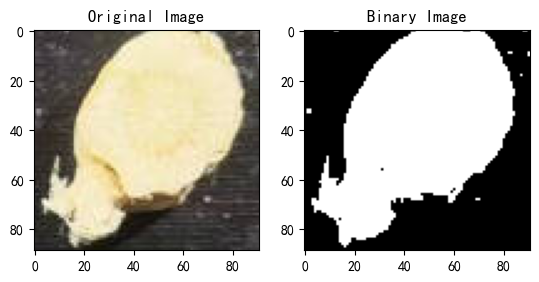

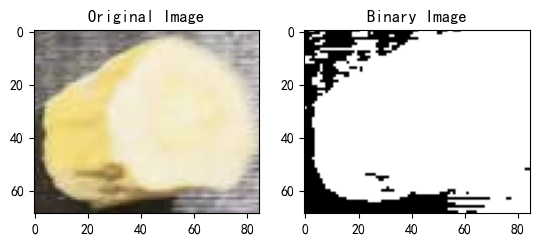

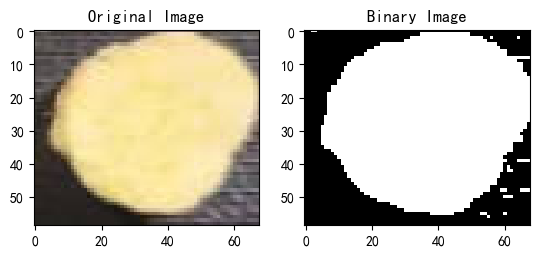

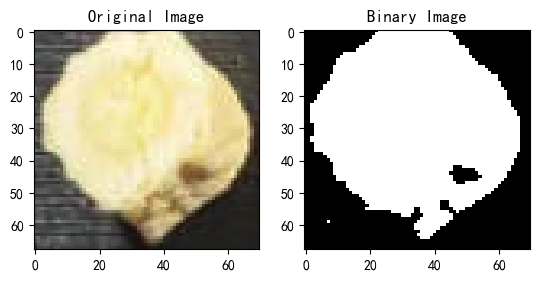

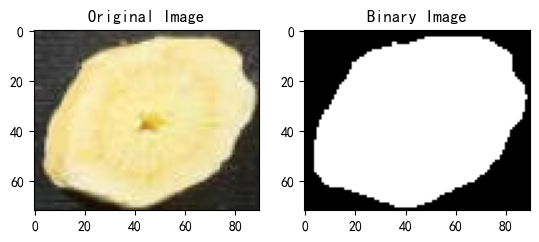

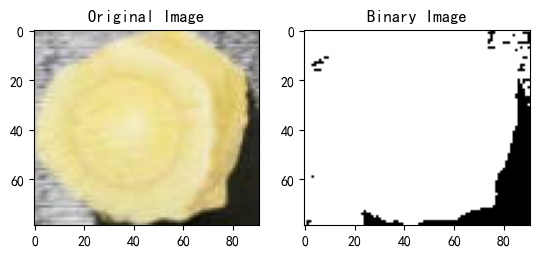

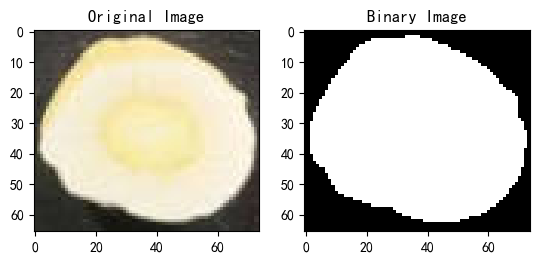

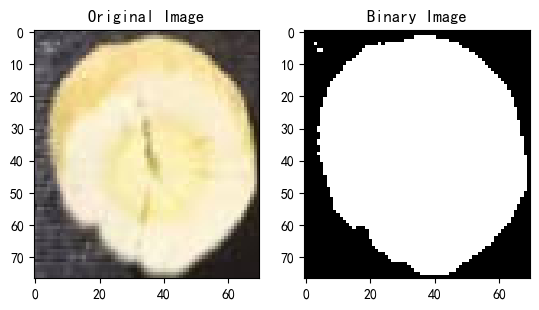

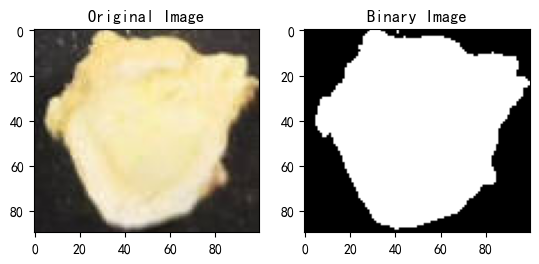

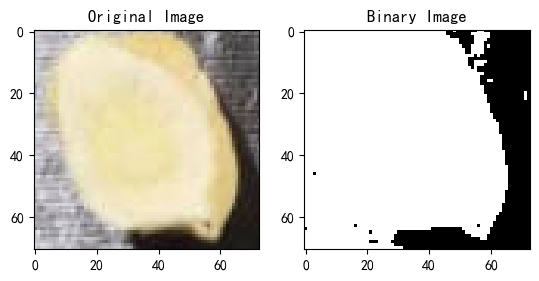

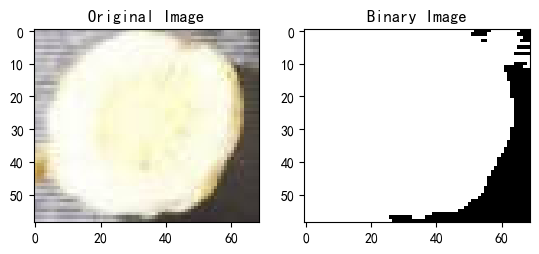

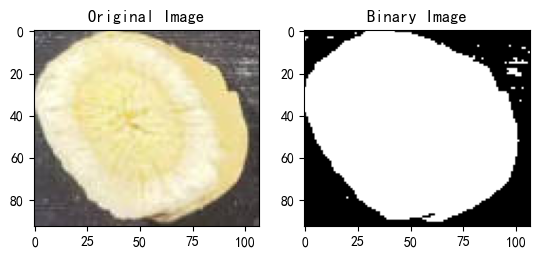

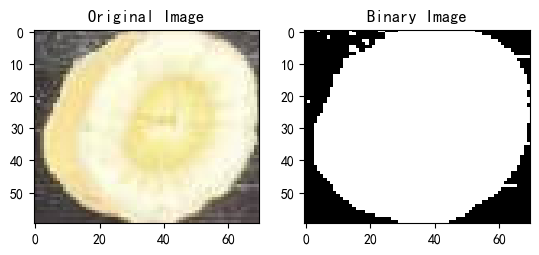

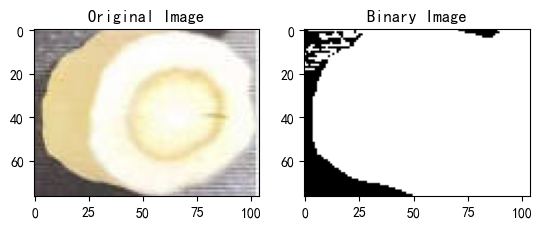

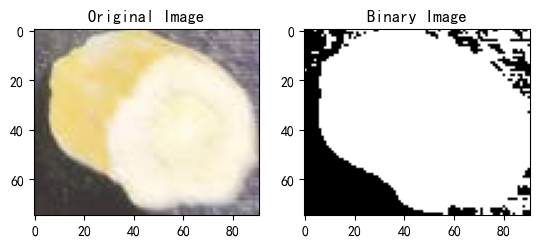

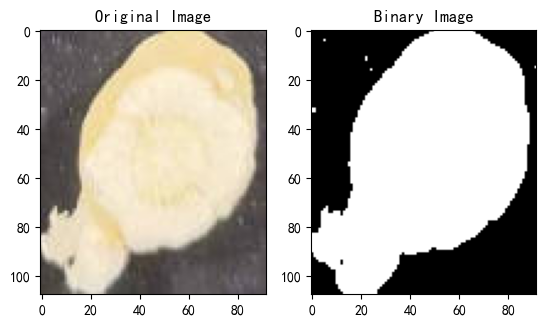

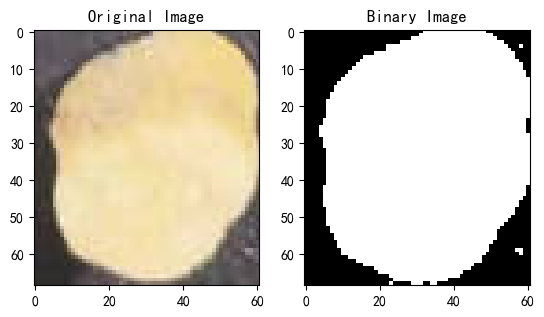

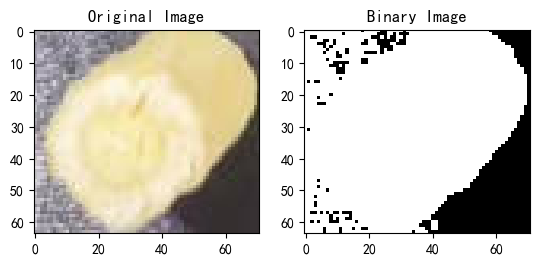

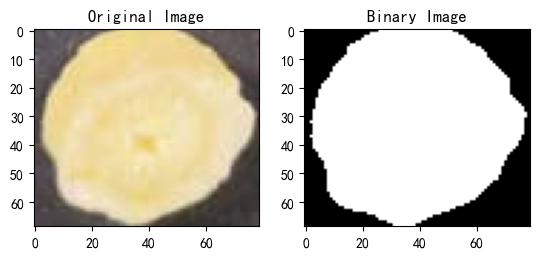

Image 1 color feature vector shape: (512,)
Image 1 contour feature vector: [  15.         4026.5         341.66399384]
Image 1 area feature: [4191]
Image 1 texture feature vector: [3.40994957e+02 9.44218397e+00 1.90128654e-01 3.31024177e-02
 9.61395752e-01]
Image 2 color feature vector shape: (512,)
Image 2 contour feature vector: [   8.         2521.          243.62236392]
Image 2 area feature: [2633]
Image 2 texture feature vector: [3.11135194e+02 8.81499726e+00 3.79619454e-01 1.08604102e-01
 9.68150235e-01]
Image 3 color feature vector shape: (512,)
Image 3 contour feature vector: [2.00000000e+00 4.11300000e+03 2.55137083e+02]
Image 3 area feature: [4226]
Image 3 texture feature vector: [2.85355422e+02 7.19009371e+00 2.99386267e-01 4.74188743e-02
 9.75426322e-01]
Image 4 color feature vector shape: (512,)
Image 4 contour feature vector: [  29.         5702.          518.27416599]
Image 4 area feature: [5775]
Image 4 texture feature vector: [2.66292677e+02 8.34141414e+00 3.14845368e-

In [30]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Compute the color histogram
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_contour_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize contour features
    contour_areas = []
    contour_perimeters = []
    
    # Calculate contour areas and perimeters
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        contour_areas.append(area)
        contour_perimeters.append(perimeter)
    
    # Calculate total contour area and perimeter
    total_area = np.sum(contour_areas)
    total_perimeter = np.sum(contour_perimeters)
    
    # Number of contours
    num_contours = len(contours)
    
    # Return the contour features
    return np.array([num_contours, total_area, total_perimeter])

def extract_area_feature(image, display=False):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    if display:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 2, 2)
        plt.title('Binary Image')
        plt.imshow(binary, cmap='gray')
        plt.show()
    
    # Calculate the area (number of white pixels)
    area = np.sum(binary == 255)
    return np.array([area])

def extract_texture_features(image, distances=[1], angles=[0]):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate GLCM
    glcm = graycomatrix(gray, distances=distances, angles=angles, symmetric=True, normed=True)
    
    # Extract texture features
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    
    # Combine all features into one vector
    texture_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    return texture_features

def load_images_and_extract_features(image_folder, display=False):
    # Get a list of image file paths
    image_paths = glob(os.path.join(image_folder, '*.jpg'))
    color_features = []
    contour_features = []
    area_features = []
    texture_features = []
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            continue
        # Extract color histogram feature
        color_hist = extract_color_histogram(image)
        color_features.append(color_hist)
        # Extract contour feature
        contour_feat = extract_contour_features(image)
        contour_features.append(contour_feat)
        # Extract area feature
        area_feat = extract_area_feature(image, display=display)
        area_features.append(area_feat)
        # Extract texture feature
        texture_feat = extract_texture_features(image)
        texture_features.append(texture_feat)
    
    return color_features, contour_features, area_features, texture_features

# Example usage
image_folder = 'data'  # Replace with your folder containing the images
# Set display=True to show binary images
color_features, contour_features, area_features, texture_features = load_images_and_extract_features(image_folder, display=True)

# Output the features
for i, (color_feat, contour_feat, area_feat, texture_feat) in enumerate(zip(color_features, contour_features, area_features, texture_features)):
    print(f"Image {i+1} color feature vector shape: {color_feat.shape}")
    print(f"Image {i+1} contour feature vector: {contour_feat}")
    print(f"Image {i+1} area feature: {area_feat}")
    print(f"Image {i+1} texture feature vector: {texture_feat}")


In [31]:
import numpy as np

# 对特征列表中的每组数据进行拼接
def merge_features(color_features, contour_features, area_features, texture_features):
    merged_features = []
    for color, contour, area, texture in zip(color_features, contour_features, area_features, texture_features):
        # 拼接每组数据
        combined_features = np.hstack([color, contour, area, texture])
        merged_features.append(combined_features)
    return merged_features

# 假设已经提取到的特征列表
# 请使用实际提取的特征列表
# color_features = [...]
# contour_features = [...]
# area_features = [...]
# texture_features = [...]

# 对特征列表中的每组数据进行拼接
merged_features = merge_features(color_features, contour_features, area_features, texture_features)

# 将37份特征合并成一个列表
all_features = np.array(merged_features)

# 输出融合后的特征列表的形状和第一个图像的组合特征向量
print(f"Combined feature vectors shape: {all_features.shape}")
print(f"Combined feature vector for the first image: {all_features[0]}")


Combined feature vectors shape: (36, 521)
Combined feature vector for the first image: [0.00000000e+00 2.82525644e-03 7.06314072e-02 6.01375997e-02
 1.61443222e-02 3.63247236e-03 1.21082412e-03 8.07216100e-04
 0.00000000e+00 7.26494491e-02 7.99143910e-02 3.83427665e-02
 1.25118494e-02 9.28298477e-03 8.87937751e-03 8.19324329e-02
 0.00000000e+00 3.10778189e-02 3.79391573e-02 6.86133699e-03
 1.61443220e-03 2.01804028e-03 2.01804028e-03 4.03608056e-03
 0.00000000e+00 8.07216112e-03 9.68659297e-03 4.03608050e-04
 4.03608050e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.65051287e-03 5.24690468e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.07216100e-04 8.07216100e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.07216100e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.03608050e-04 0.00000000e+00 0.00000000e+0

In [32]:
from sklearn.cluster import KMeans

# 创建KMeans对象，指定要聚类的簇数为3
kmeans = KMeans(n_clusters=3, random_state=42)

# 对特征向量进行聚类
clusters = kmeans.fit_predict(all_features)

# 打印每个样本所属的簇
print("Cluster assignments:", clusters)


Cluster assignments: [2 1 2 0 2 1 2 0 1 1 1 0 2 1 1 0 1 2 2 1 1 2 0 1 1 0 2 1 0 1 0 2 0 1 1 2]


D:\anconda\envs\pytorch_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


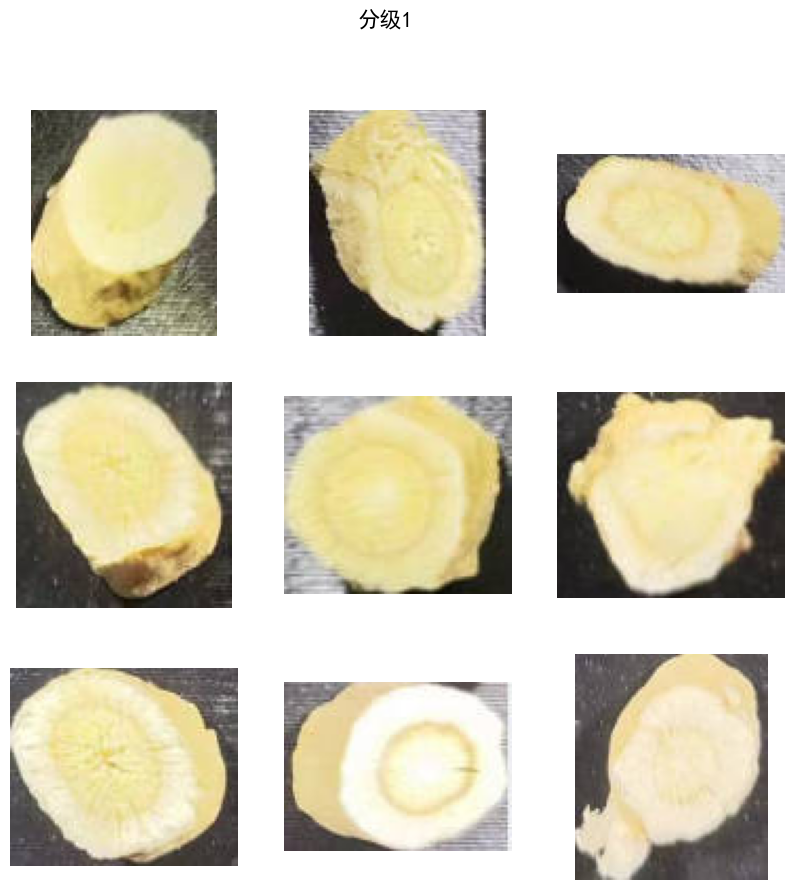

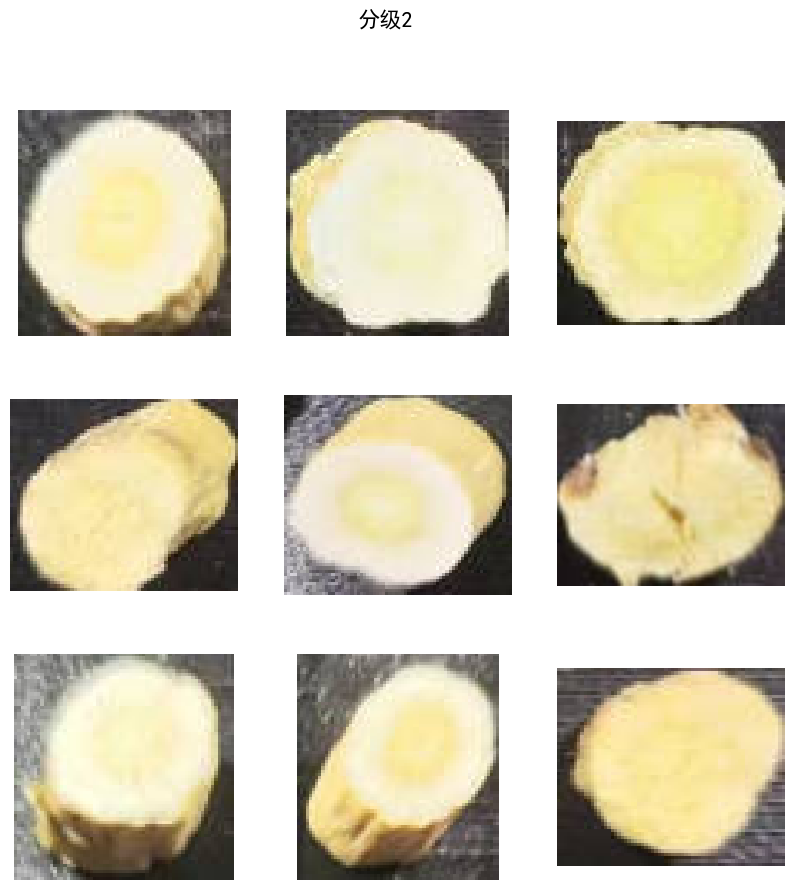

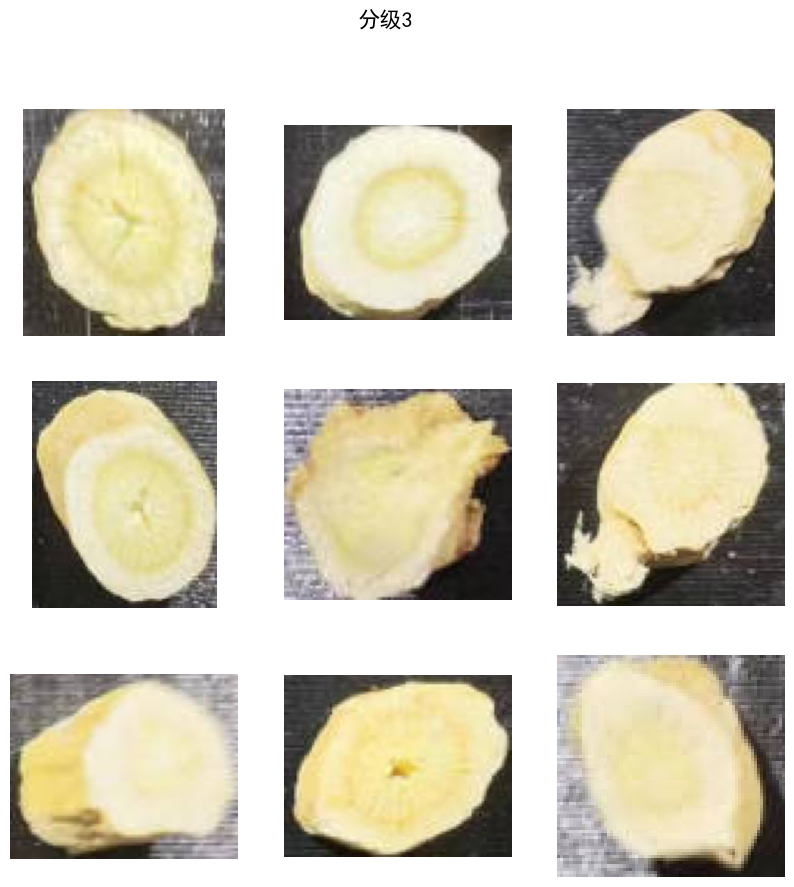

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] # 处理中文乱码

# 构建图像路径列表
image_paths = []
for i in range(1, 38):  # 图片编号从001到037
    image_paths.append(f"data//{str(i).zfill(3)}.jpg")

# 创建一个字典，用于存储每个簇中的图像
cluster_images = {cluster_id: [] for cluster_id in range(3)}

# 根据聚类结果将图像分组
for idx, cluster_id in enumerate(clusters):
    cluster_images[cluster_id].append(image_paths[idx])  # 假设image_paths是包含每个图像路径的列表

# 可视化每个簇中的图像
for cluster_id, images in cluster_images.items():
    plt.figure(figsize=(10, 10))
    plt.suptitle(f'分级{cluster_id+1}', fontsize=16)
    for i in range(min(len(images), 9)):  # 最多显示9张图像
        img = plt.imread(images[i])
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
